In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [3]:
results_2022 = pd.read_csv("epl_results_2022-23.csv")

In [4]:
results_2022

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,28/05/2023,16:30,Everton,Bournemouth,1,0,H,0,0,D,...,6,2,11,12,9,3,1,3,0,0
376,28/05/2023,16:30,Leeds,Tottenham,1,4,A,0,1,A,...,2,7,7,5,12,3,3,0,0,0
377,28/05/2023,16:30,Leicester,West Ham,2,1,H,1,0,H,...,4,3,8,10,3,5,1,1,0,0
378,28/05/2023,16:30,Man United,Fulham,2,1,H,1,1,D,...,8,3,14,10,5,4,1,2,0,0


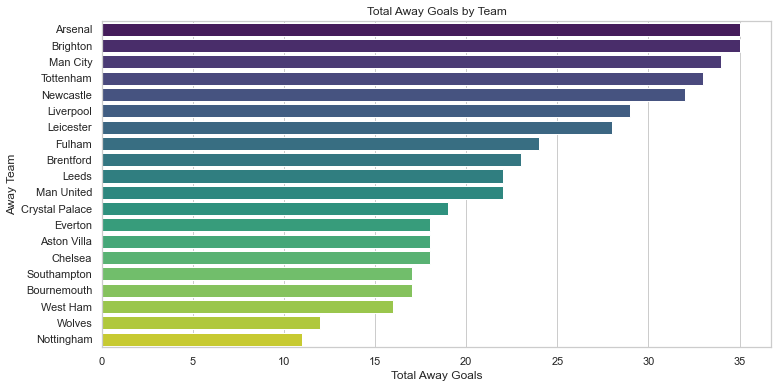

In [5]:
away_goals_df = results_2022.groupby('AwayTeam')['FTAG'].sum().reset_index()

# Sort the teams in descending order based on total away goals
sorted_away_goals_df = away_goals_df.sort_values(by='FTAG', ascending=False)

# Create a Seaborn bar plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='FTAG', y='AwayTeam', data=sorted_away_goals_df, palette="viridis")

# Set labels and title
plt.xlabel('Total Away Goals')
plt.ylabel('Away Team')
plt.title('Total Away Goals by Team')

# Display the plot
plt.show()


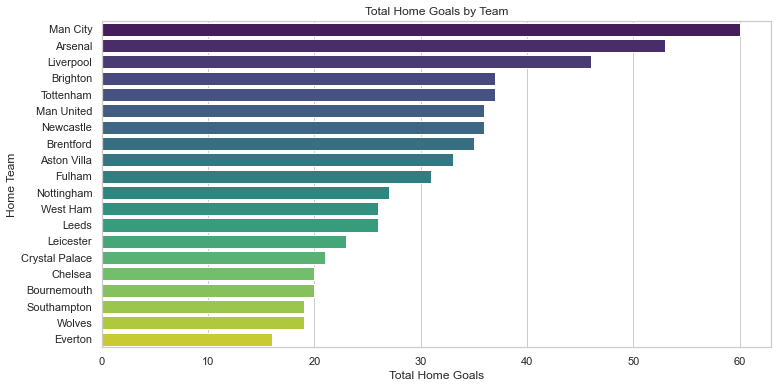

In [6]:
home_goals_df = results_2022.groupby('HomeTeam')['FTHG'].sum().reset_index()

# Sort the teams in descending order based on total away goals
sorted_home_goals_df = home_goals_df.sort_values(by='FTHG', ascending=False)

# Create a Seaborn bar plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='FTHG', y='HomeTeam', data=sorted_home_goals_df, palette="viridis")

# Set labels and title
plt.xlabel('Total Home Goals')
plt.ylabel('Home Team')
plt.title('Total Home Goals by Team')

# Display the plot
plt.show()


In [7]:
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# Replace 'df' with your actual DataFrame name if different

# Group the data by 'HomeTeam' and calculate the total goals scored at home
home_goals_df = results_2022.groupby('HomeTeam')['FTHG'].sum().reset_index()

# Group the data by 'AwayTeam' and calculate the total goals scored away
away_goals_df = results_2022.groupby('AwayTeam')['FTAG'].sum().reset_index()

# Combine home and away goals for each team into a single DataFrame
total_goals_df = home_goals_df.merge(away_goals_df, left_on='HomeTeam', right_on='AwayTeam', how='outer')

# Rename columns for clarity
total_goals_df.rename(columns={'HomeTeam': 'Team', 'FTHG': 'GoalsAtHome', 'FTAG': 'GoalsAway'}, inplace=True)

# Fill missing values with 0 for teams that didn't play at home or away
total_goals_df.fillna(0, inplace=True)

# Calculate the total goals scored by each team
total_goals_df['TotalGoals'] = total_goals_df['GoalsAtHome'] + total_goals_df['GoalsAway']

# Sort the teams in descending order based on total goals scored
sorted_goals_df = total_goals_df.sort_values(by='TotalGoals', ascending=False)

# Display the sorted DataFrame
print(sorted_goals_df)


              Team  GoalsAtHome        AwayTeam  GoalsAway  TotalGoals
12        Man City           60        Man City         34          94
0          Arsenal           53         Arsenal         35          88
11       Liverpool           46       Liverpool         29          75
4         Brighton           37        Brighton         35          72
17       Tottenham           37       Tottenham         33          70
14       Newcastle           36       Newcastle         32          68
3        Brentford           35       Brentford         23          58
13      Man United           36      Man United         22          58
8           Fulham           31          Fulham         24          55
1      Aston Villa           33     Aston Villa         18          51
10       Leicester           23       Leicester         28          51
9            Leeds           26           Leeds         22          48
18        West Ham           26        West Ham         16          42
6   Cr

In [8]:
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# Replace 'df' with your actual DataFrame name if different

# Create a DataFrame for home clean sheets
home_clean_sheets = results_2022[results_2022['FTHG'] == 0]

# Group the data by 'HomeTeam' and count the number of clean sheets at home
home_clean_sheet_counts = home_clean_sheets.groupby('HomeTeam').size().reset_index(name='HomeCleanSheets')

# Create a DataFrame for away clean sheets
away_clean_sheets = results_2022[results_2022['FTAG'] == 0]

# Group the data by 'AwayTeam' and count the number of clean sheets away
away_clean_sheet_counts = away_clean_sheets.groupby('AwayTeam').size().reset_index(name='AwayCleanSheets')

# Merge the home and away clean sheet counts
clean_sheet_counts = home_clean_sheet_counts.merge(away_clean_sheet_counts, left_on='HomeTeam', right_on='AwayTeam', how='outer')

# Fill missing values with 0 for teams that didn't have clean sheets
clean_sheet_counts.fillna(0, inplace=True)

# Calculate the total clean sheets for each team
clean_sheet_counts['TotalCleanSheets'] = clean_sheet_counts['HomeCleanSheets'] + clean_sheet_counts['AwayCleanSheets']

# Sort the teams in descending order based on total clean sheets
sorted_clean_sheets_df = clean_sheet_counts.sort_values(by='TotalCleanSheets', ascending=False)

# Display the sorted DataFrame
print(sorted_clean_sheets_df)


          HomeTeam  HomeCleanSheets        AwayTeam  AwayCleanSheets  \
2      Bournemouth              8.0     Bournemouth               10   
6   Crystal Palace              7.0  Crystal Palace                9   
18          Wolves              6.0          Wolves                9   
15     Southampton              7.0     Southampton                8   
5          Chelsea              7.0         Chelsea                7   
7          Everton              5.0         Everton                9   
17        West Ham              4.0        West Ham                9   
14      Nottingham              2.0      Nottingham               10   
10       Leicester              8.0       Leicester                4   
13       Newcastle              5.0       Newcastle                6   
9            Leeds              4.0           Leeds                6   
3        Brentford              2.0       Brentford                7   
8           Fulham              4.0          Fulham             

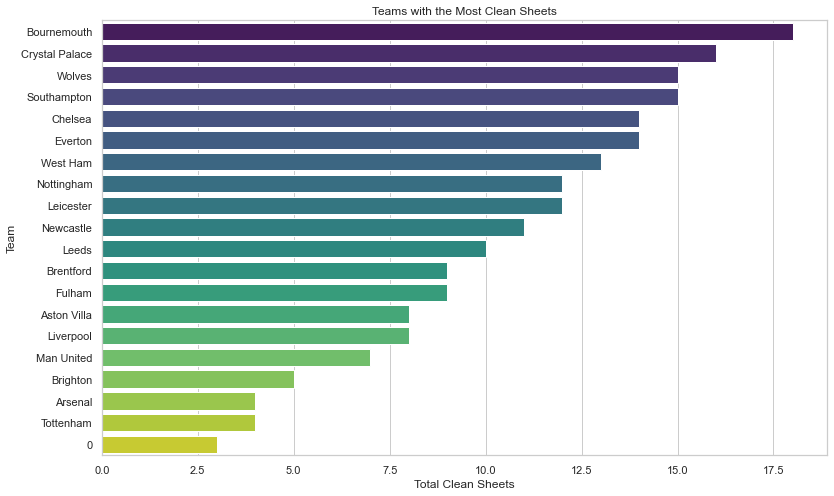

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Replace 'df' with your actual DataFrame name if different

# Create a DataFrame for home clean sheets
home_clean_sheets = results_2022[results_2022['FTHG'] == 0]

# Group the data by 'HomeTeam' and count the number of clean sheets at home
home_clean_sheet_counts = home_clean_sheets.groupby('HomeTeam').size().reset_index(name='HomeCleanSheets')

# Create a DataFrame for away clean sheets
away_clean_sheets = results_2022[results_2022['FTAG'] == 0]

# Group the data by 'AwayTeam' and count the number of clean sheets away
away_clean_sheet_counts = away_clean_sheets.groupby('AwayTeam').size().reset_index(name='AwayCleanSheets')

# Merge the home and away clean sheet counts
clean_sheet_counts = home_clean_sheet_counts.merge(away_clean_sheet_counts, left_on='HomeTeam', right_on='AwayTeam', how='outer')

# Fill missing values with 0 for teams that didn't have clean sheets
clean_sheet_counts.fillna(0, inplace=True)

# Calculate the total clean sheets for each team
clean_sheet_counts['TotalCleanSheets'] = clean_sheet_counts['HomeCleanSheets'] + clean_sheet_counts['AwayCleanSheets']

# Sort the teams in descending order based on total clean sheets
sorted_clean_sheets_df = clean_sheet_counts.sort_values(by='TotalCleanSheets', ascending=False)

# Plot the bar graph
plt.figure(figsize=(13, 8))
ax=sns.barplot(x='TotalCleanSheets', y='HomeTeam', data=sorted_clean_sheets_df, palette='viridis')
plt.xlabel('Total Clean Sheets')
plt.ylabel('Team')
plt.title('Teams with the Most Clean Sheets')

plt.show()



In [10]:
df = pd.read_csv("2022-2023 Football Team Stats.csv")
df

,Unnamed: 0,Rk,Squad,Country,LgRk,MP,W,D,L,GF,...,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,0,1,Barcelona,ESP,1,29,23,4,2,53,...,44,73,2.52,55.9,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen
1,1,2,Napoli,ITA,1,30,24,3,3,66,...,45,75,2.50,53.2,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret
2,2,3,Paris S-G,FRA,1,32,24,3,5,75,...,44,75,2.34,64.7,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma
3,3,4,Arsenal,ENG,1,32,23,6,3,77,...,43,75,2.34,64.1,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale
4,4,5,Manchester City,ENG,2,30,22,4,4,78,...,50,70,2.33,63.5,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,94,Ajaccio,FRA,19,31,6,3,22,22,...,-36,21,0.68,34.2,42.6,-8.4,-0.27,6422,Youcef Belaïli Mounaim El Idrissy - 6,Benjamin Leroy
94,94,95,Cremonese,ITA,19,30,3,10,17,27,...,-27,19,0.63,31.7,53.7,-22.0,-0.73,7651,Cyriel Dessers Daniel Ciofani - 6,Marco Carnesecchi
95,95,96,Sampdoria,ITA,20,31,3,8,20,20,...,-32,17,0.55,27.8,51.3,-23.5,-0.76,12107,Manolo Gabbiadini - 6,Emil Audero
96,96,97,Elche,ESP,20,29,2,7,20,20,...,-39,13,0.45,25.5,56.7,-31.1,-1.07,20872,Pere Milla - 6,Édgar Badía


In [11]:
df1 =pd.read_csv("2022-2023 Football Player Stats.csv")
df1 

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,2684,2685,Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,1997,2,...,0.00,2.50,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
2685,2685,2686,Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1997,1,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
2686,2686,2687,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,1998,20,...,0.05,2.51,0.70,0.0,0.0,0.00,5.19,0.48,0.70,40.9
2687,2687,2688,Milan ?uri?,BIH,FW,Hellas Verona,Serie A,32,1990,16,...,0.38,0.00,0.13,0.0,0.0,0.00,2.05,14.50,3.59,80.1


In [15]:
df = pd.read_csv("2022-2023 Football Player Stats.csv ")

premier_league_players = df[df['Comp'] == 'Premier League']

# Display the table of Premier League players
premier_league_players.columns


Index(['Unnamed: 0', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age',
       'Born', 'MP',
       ...
       'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon',
       'AerLost', 'AerWon%'],
      dtype='object', length=125)

In [19]:

test = premier_league_players[premier_league_players['SoT%'] > 60]
test

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
82,82,83,Daniel Amartey,GHA,DF,Leicester City,Premier League,28,1994,17,...,0.00,0.00,0.39,0.0,0.07,0.0,5.53,1.91,1.51,55.8
117,117,118,Joe Aribo,NGA,MFFW,Southampton,Premier League,26,1996,19,...,0.00,0.57,1.56,0.0,0.00,0.0,5.90,2.21,2.95,42.9
351,351,352,Armando Broja,ALB,FW,Chelsea,Premier League,21,2001,12,...,0.91,0.00,0.30,0.3,0.00,0.0,4.55,2.73,6.36,30.0
421,421,422,Thomas Cannon,IRL,FW,Everton,Premier League,20,2002,2,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,6.67,0.0
473,473,474,Julio César Enciso,PAR,FWMF,Brighton,Premier League,19,2004,5,...,0.00,0.67,0.00,0.0,0.00,0.0,2.67,0.67,0.67,50.0
479,479,480,Nathaniel Chalobah,ENG,MF,Fulham,Premier League,28,1994,4,...,0.00,0.00,10.00,0.0,0.00,0.0,0.00,10.00,20.00,33.3
516,516,517,Conor Coady,ENG,DF,Everton,Premier League,29,1993,19,...,0.11,0.05,0.42,0.0,0.00,0.0,3.92,1.11,1.11,50.0
590,590,591,Mikkel Damsgaard,DEN,MFFW,Brentford,Premier League,22,2000,11,...,0.00,2.81,2.19,0.0,0.00,0.0,7.50,0.31,2.19,12.5
635,635,636,Siriki Dembélé,CIV,FWMF,Bournemouth,Premier League,26,1996,6,...,0.00,2.50,0.83,0.0,0.00,0.0,7.50,0.00,3.33,0.0
644,644,645,Leander Dendoncker,BEL,MF,Wolves,Premier League,27,1995,4,...,0.00,0.42,0.83,0.0,0.00,0.0,6.67,0.83,2.08,28.6


In [20]:
test1 =premier_league_players['SoT%']
test1

0       18.5
14      36.1
15       0.0
17      50.0
29       0.0
        ... 
2664     0.0
2673    20.0
2675    18.2
2680    27.3
2686    31.4
Name: SoT%, Length: 540, dtype: float64